<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 7

Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Linear Support Vector Machine Basics

### Problem 1.1 (Exam Style)

It is possible to find values $w, b$ such that $H(w,b)=0$ because the training set $T$ is linearly separable - since a linear SVM is a linear classifier, if the data is separable, it is possible to find a hyperplane that perfectly divides the data, making the hinge loss zero.

### Problem 1.2 (Exam Style)

The reference margin $\mu^*$ is equal to the distance from the decision boundary to the closest point to the decision boundary.

The decision boundary with maximum reference margin when $H(w^*,b^*)=0$ (or in words, when the boundary perfectly separates the data) is a linear boundary where the two closest points to the boundary (one in each half-space) are equidistant from the boundary.

We can see that the two points that will be the closest points are $(1,-1)$ and $(2,1)$ for our hyperplane when maximizing the distance from these points to the hyperplane. We'll say that the hyperplane is orthogonal to and goes through the midpoint of the line formed by connecting the two aforementioned points. 

The midpoint of these two points is $(1.5,0)$; therefore, the shortest distance from each of the two (equidistant) points is $\mu^* = \frac{\sqrt{5}}{2}$.

### Problem 1.3 (Exam Style)

### Problem 1.4 (Exam Style)

### Problem 1.5 (Exam Style)

## Part 2: Binary Linear SVMs and LRCs 

### Problem 2.1

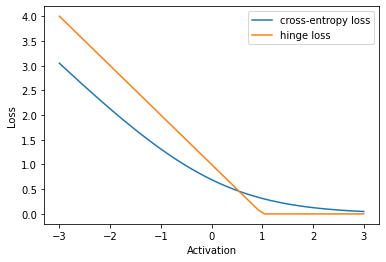

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

def score(alpha):
    return 1/(1+ math.exp(-alpha))

def cross_loss(y, alpha):
    return -y*np.log(score(alpha)) - (1-y)*np.log(1-score(alpha))

def hinge_loss(y, alpha):
    return max(0, 1-y*alpha)

alpha_space = np.linspace(-3,3)
l_ce = [cross_loss(1, a) for a in alpha_space]
l_e = [hinge_loss(1, a) for a in alpha_space]

plt.plot(alpha_space, l_ce, label='cross-entropy loss')
plt.plot(alpha_space, l_e, label='hinge loss')
plt.xlabel('Activation')
plt.ylabel('Loss')
plt.legend()

### Problem 2.2

In [2]:
from urllib.request import urlretrieve
from os import path as osp
import pickle


def retrieve(file_name, semester='fall22', course='371', homework=7):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [3]:
balanced_file_name = 'balanced.pickle'
retrieve(balanced_file_name)

Using previously downloaded file balanced.pickle


In [4]:
with open(balanced_file_name, 'rb') as file:
    balanced_data = pickle.load(file)

In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

def experiment(data_set, h, h_name):
    # evaluation using either LRC or SVM
    h.fit(data_set['train']['x'], data_set['train']['y'])
    score_train = h.score(data_set['train']['x'], data_set['train']['y'])
    score_test = h.score(data_set['test']['x'], data_set['test']['y'])

    # printing out accuracy values on testing and training sets
    print('training accuracy on the original split using {} is {:.2f} percent'.format(h_name, 100*score_train))
    print('testing accuracy on the original split using {} is {:.2f} percent'.format(h_name, 100*score_test))
    
    if h_name == 'SVM':
        print('The number of support vectors found is: {}.'.format(len(h.support_)))
        
    # displaying classification results
    show_classification(h, data_set, h_name)
    
def show_split(h, data, h_name, s):
    fs = 12
    x, y = data[s]['x'], data[s]['y'] # true values
    y_predict = h.predict(x)          # predicted values
    n = len(y)
    labels, colors = (-1, 1), ('r', 'b')
    indices = []
    if h_name == 'SVM': 
        indices = h.support_
        for label, color in zip(labels, colors):
            x_correct_svm, x_correct, x_incorrect_svm, x_incorrect = [], [], [], []
            for value in range(len(x)):
                if y[value] == y_predict[value] == label and value in indices:
                    x_correct_svm.append(x[value])
                elif y[value] == y_predict[value] == label and value not in indices:
                    x_correct.append(x[value])
                elif y[value] == label and y[value] != y_predict[value] and value in indices:
                    x_incorrect_svm.append(x[value])
                elif y[value] == label and y[value] != y_predict[value] and value not in indices:
                    x_incorrect.append(x[value])
            x_0, x_1 = [x[0] for x in x_correct_svm], [x[1] for x in x_correct_svm]
            plt.plot(x_0, x_1, 'o' + color, ms=3, fillstyle='full')       
            x_0, x_1 = [x[0] for x in x_correct], [x[1] for x in x_correct]
            plt.plot(x_0, x_1, 'o' + color, ms=3, fillstyle='none')
            x_0, x_1 = [x[0] for x in x_incorrect_svm], [x[1] for x in x_incorrect_svm]
            plt.plot(x_0, x_1, 'v' + color, ms=3, fillstyle='full')
            x_0, x_1 = [x[0] for x in x_incorrect], [x[1] for x in x_incorrect]
            plt.plot(x_0, x_1, 'v' + color, ms=3, fillstyle='none')
    elif h_name == 'LRC':
        for label, color in zip(labels, colors):
            x_correct, x_incorrect = [], []
            for value in range(len(x)):
                if y[value] == y_predict[value] == label:
                    x_correct.append(x[value])
                elif y[value] == label and y[value] != y_predict[value]:
                    x_incorrect.append(x[value])
            x_0, x_1 = [x[0] for x in x_correct], [x[1] for x in x_correct]
            plt.plot(x_0, x_1, 'o' + color, ms=3)       
            x_0, x_1 = [x[0] for x in x_incorrect], [x[1] for x in x_incorrect]
            plt.plot(x_0, x_1, 'v' + color, ms=3)
    plt.axis('equal')
    plt.axis('off')
    suffix = 'ing' if s == 'train' else ''
    plt.title('{} {}{} set'.format(h_name, s, suffix), fontsize=fs)
    
# colors the decision regions and draws decision boundary (margin lines for SVM) 
def show_classification(h, data_set, h_name):
    plt.figure(figsize=(10, 5), tight_layout=True)
    for plot, s in enumerate(('train', 'test')):
        plt.subplot(1, 2, plot+1)
        show_split(h, data_set, h_name, s)

        x_axis = np.arange(-2, 2, 0.01)
        y_axis = np.arange(-2, 2, 0.01)
        X, Y = np.meshgrid(x_axis, y_axis)
        Z = h.predict(np.array([X.ravel(), Y.ravel()]).T)
        Z = Z.reshape(X.shape)

        plt.contourf(X, Y, Z, cmap = 'RdBu', alpha=0.3)
        plt.contour(X, Y, Z, levels=[0], colors='k', linestyles=['-'])

        if h_name == 'SVM':
            Z = h.decision_function(np.array([X.ravel(), Y.ravel()]).T)
            Z = Z.reshape(X.shape)
            plt.contour(X, Y, Z, levels=[-1,1], colors='k', linestyles=['--','--'])
            
    plt.show()

training accuracy on the original split using SVM is 94.50 percent
testing accuracy on the original split using SVM is 95.10 percent
The number of support vectors found is: 164.


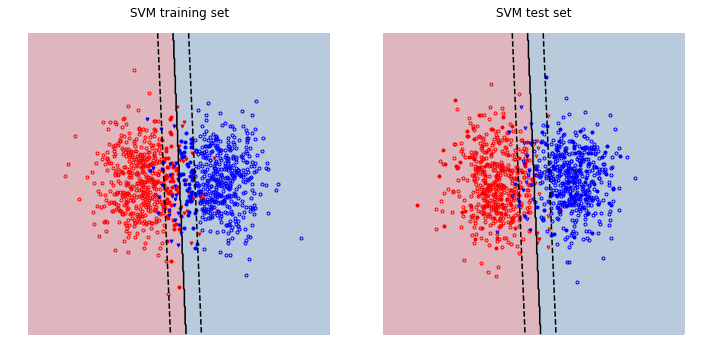

In [33]:
experiment(balanced_data, SVC(kernel='linear'), 'SVM')

training accuracy on the original split using LRC is 94.50 percent
testing accuracy on the original split using LRC is 95.10 percent


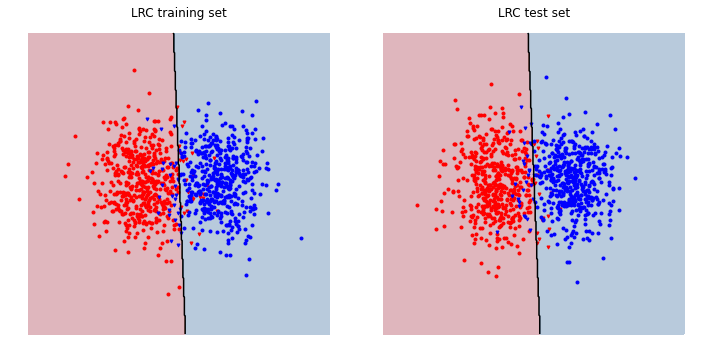

In [34]:
experiment(balanced_data, LogisticRegression(), 'LRC')

After reviewing the results for both the SVM and Logistic Regression model in the above part, it appears both classifiers generalize reasonably well, with testing accuracies higher than training in both cases. Relative to one another, the models are equally accurate on the provided data set. The major limitation in accuracy of the logistic regression and SVM model is the assumption of linear separability in the prescribed dataset, which cannot be accomplished in this case. Therefore we see that the LRC and SVM are interchangeable in this example with binary linear classifiers.

### Problem 2.3

In [7]:
imbalanced_file_name = 'imbalanced.pickle'
retrieve(imbalanced_file_name)

Using previously downloaded file imbalanced.pickle


In [8]:
with open(imbalanced_file_name, 'rb') as file:
    imbalanced_data = pickle.load(file)

training accuracy on the original split using LRC is 99.90 percent
testing accuracy on the original split using LRC is 93.17 percent


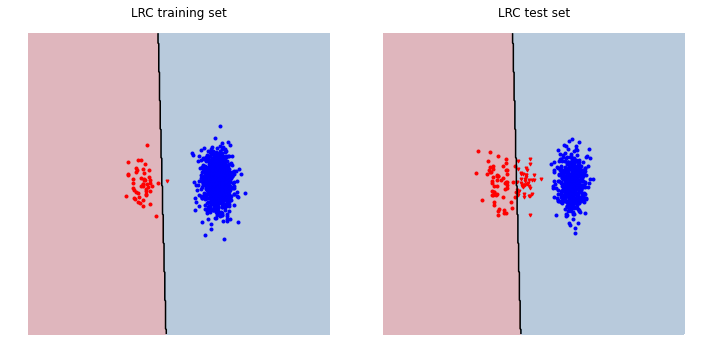

In [35]:
experiment(imbalanced_data, LogisticRegression(), 'LRC')

training accuracy on the original split using SVM is 100.00 percent
testing accuracy on the original split using SVM is 97.50 percent
The number of support vectors found is: 14.


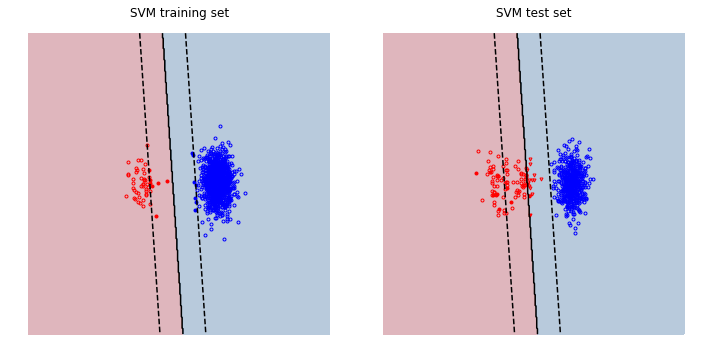

In [36]:
experiment(imbalanced_data, SVC(kernel='linear'), 'SVM')

Unlike in the previous problem, where we see the same performance between the SVC and Logistic Regression models, the SVC begins to slightly outperform in the classification of the unbalanced cancer dataset (while both methods continue to generalize reasonably well). The assumption of linear dependency, as mentioned previously, is a limitation in the accuracy of both methods. While the dataset prescribed here is linearly separable, the boundary is placed such that several datapoints are missclassified. 